# 计算机网络结果第三次作业

作业要求：

> 请复现“第十章 海龟交易系统”中介绍的六个长期趋势跟踪系统。
>
> 请以一段时间内的真实行情数据，
>
> 1）给出如《海龟交易法则（第四版）》中“表 10-1 6 个系统的历史表现对比”的测试结果。
>
> 2）并给出相应的结果说明和分析。自己的收获和感想也可以写进去。如果不能按时完成，请写明大致花费时间，原因。
>
> 注：行情数据可以通过 AkSahre 接口获得。如果是针对股票数据，可以考虑设定账户规模是 100 万人民币，单个标的持仓上限是 10 万人民币。


## 实验设置

- 实验目的：复现《海龟交易法则（第四版）》中介绍的六个长期趋势跟踪系统，并给出测试结果。
- 实验数据：美股 ETF 数据（后复权）。
  - 标的：澳元、英镑、谷物、可可、加拿大元、原油、棉花、欧元、欧洲美元、饲牛、⻩金、铜、⺠用燃料油、无铅汽油、日元、咖啡、牛、猪、墨⻄哥比索、天然气、大豆、糖、瑞士法郎、银、中期国债、⻓期国债以及小⻨
  - 时间范围：2010-01-01 至 2024-05-20。
- 实验参数：初始资金 100 万人民币，单个标的持仓上限 10 万人民币。
- 评价指标：复合平均增长率、平均月化收益率、夏普比率、最大回撤、年化波动率、胜率、盈亏比。


## 原理和实现


In [22]:
from typing import Callable
import akshare as ak
import os.path
import matplotlib as mpl
import pandas as pd
import pathlib
import datetime


# 设置显示中文字体
mpl.rcParams["font.sans-serif"] = ["Songti SC"]
mpl.rcParams["axes.unicode_minus"] = False


def get_data(path: str, getter: Callable[[], pd.DataFrame], force: bool = False) -> pd.DataFrame:
    '''
    从akshare获取数据
    path: 数据文件的路径
    getter: 获取数据的函数
    force: 是否强制重新获取数据
    返回值: pd.DataFrame
    '''
    p = pathlib.Path("data") / path
    if os.path.exists(p) and not force:
        return pd.read_pickle(p)
    else:
        data = getter()
        data.to_pickle(p)
        return data


# 获取美股实时行情数据
stock = get_data('stock_us_spot_em.pkl', ak.stock_us_spot_em)
print(stock.columns)
stock.loc[:, ['名称', '代码']].to_csv('美股列表.csv')

Index(['序号', '名称', '最新价', '涨跌额', '涨跌幅', '开盘价', '最高价', '最低价', '昨收价', '总市值',
       '市盈率', '成交量', '成交额', '振幅', '换手率', '代码'],
      dtype='object')


In [23]:
# 根据符号获取指定标的的代码
codes = {
    # 澳元
    '澳元ETF-CurrencyShares': '107.FXA',

    # 英镑
    '英镑ETF-CurrencyShares': '107.FXB',

    # 谷物
    # 可可
    # 加拿大元

    # 原油
    '原油ETF-PowerShares': '107.DBO',
    # '二倍做空原油ETF-ProShares': '107.SCO',
    # '二倍做多原油ETF-ProShares': '107.UCO',
    # '美国原油基金(近12月合约平均)': '107.USL',
    # '美国布伦特原油基金': '107.BNO',
    # '美国原油基金': '107.USO',
    # '马拉松原油': '106.MPC',

    # 棉花
    # 欧元
    '二倍做空欧元ETF-ProShares': '107.EUO',
    '二倍做多欧元ETF-ProShares': '107.ULE',
    '欧元ETF-CurrencyShares': '107.FXE',

    # 欧洲美元

    # 饲牛

    # ⻩金

    # 铜
    # 107.COPX 2010-04-20
    # '铜矿ETF-Global X': '107.COPX',

    # ⺠用燃料油

    # 无铅汽油

    # 日元
    # '二倍做空日元ETF-ProShares': '107.YCS',
    '日元ETF-CurrencyShares': '107.FXY',
    # '二倍做多日元ETF-ProShares': '107.YCL',

    # 咖啡
    # 牛
    # 猪
    # 墨⻄哥比索

    # 天然气
    # '二倍做多天然气ETF-ProShares': '107.BOIL',
    # '美国天然气基金': '107.UNG',
    '天然气ETF-First Trust': '107.FCG',
    # '二倍做空天然气ETF-ProShares': '107.KOLD',

    # 大豆
    '大豆': '107.SOYB',

    # 糖

    # 瑞士法郎
    '瑞士法郎ETF-CurrencyShares': '107.FXF',

    # 银
    # 106.PAAS 2023-04-18
    # '泛美白银': '106.PAAS',

    # 中期国债
    # 105.SHY 2017-08-07
    # '1-3年国债ETF-iShares': '105.SHY',

    # ⻓期国债
    # '三倍做空20年+国债ETF-Direxion': '107.TMV',
    # '二倍做空20年+国债ETF-ProShares': '107.TBT',
    # '做空20年+国债ETF-ProShares': '107.TBF',
    '10-20年国债ETF-iShares': '107.TLH',
    # 105.TLT 2016-02-02
    # '20年+国债ETF-iShares': '105.TLT',
    '美国超长期国债ETF-Vanguard': '107.EDV',
    '美国25年+零息票国债ETF-PIMCO': '107.ZROZ',
    # '二倍做多20年+国债ETF-ProShares': '107.UBT',
    # '三倍做多20年+国债ETF-Direxion': '107.TMF',

    # 小⻨
}

data_set: dict[str, pd.DataFrame] = {}
for name, code in codes.items():
    # print(name, code)
    data = get_data(
        f'{code}.pkl',
        lambda: ak.stock_us_hist(
            symbol=code, period='daily', start_date='20000101', end_date='20240520', adjust='hfq'
        )
    )
    # print(data.loc[:, '日期'])
    if data.loc[0, '日期']:
        print(code, data.loc[0, '日期'])
    data.loc[:, '日期'] = pd.to_datetime(data.loc[:, '日期'])
    data.set_index('日期', inplace=True)
    data_set.setdefault(code, data)
print(data.columns)

107.FXA 2006-06-26
107.FXB 2006-06-26
107.DBO 2007-01-05
107.EUO 2008-11-25
107.ULE 2008-11-25
107.FXE 2005-12-12
107.FXY 2007-02-13
107.FCG 2007-05-11
107.SOYB 2011-09-19
107.FXF 2006-06-26
107.TLH 2007-01-11
107.EDV 2008-01-29
107.ZROZ 2009-11-04
Index(['开盘', '收盘', '最高', '最低', '成交量', '成交额', '振幅', '涨跌幅', '涨跌额', '换手率'], dtype='object')


In [24]:
# 初始资金
INITIAL = 1000000
# 单个标的最大持仓
LIMIT = 100000

In [25]:
# ATR通道突破系统

def atr_channel_breakout(n: int = 14) -> pd.DataFrame:
    '''
    计算ATR
    data: pd.DataFrame
    n: int
    返回值: pd.DataFrame
    '''
    cash = INITIAL
    stocks: dict[str, float] = {}
    for code, data in data_set.items():
        stocks.setdefault(code, 0)
        assert (data['收盘'] <= data['最高']).all(), (data['最高'] - data['收盘'])
        assert (data['最低'] <= data['收盘']).all(), (data['最低'] - data['收盘'])
        data['真实波幅'] = data.apply(lambda x: abs(x['最高'] - x['最低']), axis=1)
        # print(n)
        data['平均真实波幅'] = data['真实波幅'].rolling(n).mean()
        data['350日移动平均收盘价'] = data['收盘'].rolling(
            datetime.timedelta(350)).mean()
        data['通道顶部'] = data['350日移动平均收盘价'] + 7 * data['平均真实波幅']
        data['通道底部'] = data['350日移动平均收盘价'] - 3 * data['平均真实波幅']

    result = []

    days = data_set['107.FXA'][data_set['107.FXA'].index > '2020-01-01'].index

    yesterday_total = INITIAL

    for i in range(len(days)):
        total = 0
        for code, data in data_set.items():
            yesterday = days[i - 1]
            today = days[i]
            open_today: float = data.loc[today, '开盘']
            close_yesterday: float = data.loc[yesterday, '收盘']
            close_today: float = data.loc[today, '收盘']
            upper_bound: float = data.loc[yesterday, '通道顶部']
            lower_bound: float = data.loc[yesterday, '通道底部']
            atr: float = data.loc[yesterday, '平均真实波幅']

            if close_yesterday * stocks[code] > LIMIT:
                # 卖出
                to_sell = (LIMIT - stocks[code] * open_today) // open_today
                # assert to_sell >= 0, (to_sell, stocks[code], cash)
                if to_sell > 0:
                    cash += open_today * to_sell
                    stocks[code] -= to_sell
            elif close_yesterday > upper_bound:
                # 买入
                if stocks[code] * close_yesterday < LIMIT:
                    to_buy = min(
                        (LIMIT - stocks[code] *
                         close_yesterday) // close_yesterday,
                        (close_yesterday - upper_bound) / atr *
                        0.01 * yesterday_total // close_yesterday,
                        cash // open_today
                    )
                    assert to_buy >= 0, (to_buy, stocks[code], cash)
                    stocks[code] += to_buy
                    cash -= open_today * to_buy
                    assert cash >= 0
            elif close_yesterday < lower_bound:
                # 卖出
                cash += open_today * stocks[code]
                stocks[code] = 0
            total += close_today * stocks[code]
        total += cash
        yesterday_total = total
        r = {
            '日期': today,
            '现金': cash,
            '资金': total,
        }
        r.update({
            f'{code}-stock': stocks[code] for code, _ in data_set.items()
        })
        r.update({
            f'{code}-value': data.loc[today, '收盘'] * stocks[code] for code, data in data_set.items()
        })
        result.append(r)
    return pd.DataFrame(result)

,日期,现金,资金,107.FXA-stock,107.FXB-stock,107.DBO-stock,107.EUO-stock,107.ULE-stock,107.FXE-stock,107.FXY-stock,...,107.EUO-value,107.ULE-value,107.FXE-value,107.FXY-value,107.FCG-value,107.SOYB-value,107.FXF-value,107.TLH-value,107.EDV-value,107.ZROZ-value
count,1103,1103.000000,1.103000e+03,1103.000000,1103.000000,1103.000000,1103.000000,1103.000000,1103.000000,1103.000000,...,1103.000000,1103.000000,1103.000000,1103.000000,1103.000000,1103.000000,1103.000000,1103.000000,1103.000000,1103.000000
mean,2022-03-11 00:40:28.286491392,405367.653960,1.148406e+06,454.971895,363.056210,7302.097008,2892.213055,2482.666364,351.142339,159.284678,...,84789.535023,33947.745247,37830.767332,14323.520843,138929.168994,111318.841644,50466.085711,26340.858268,27522.099193,27920.500961
min,2020-01-02 00:00:00,0.620000,9.954597e+05,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,2021-02-04 12:00:00,194507.365000,1.056492e+06,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,182.495000,110734.485000,0.000000,0.000000,0.000000,0.000000
50%,2022-03-10 00:00:00,456165.797000,1.173711e+06,0.000000,67.000000,9823.000000,4127.000000,0.000000,0.000000,0.000000,...,112877.577000,0.000000,0.000000,0.000000,180219.720000,133346.040000,25639.680000,0.000000,0.000000,0.000000
75%,2023-04-15 12:00:00,592683.287000,1.228528e+06,1426.000000,786.000000,9823.000000,4127.000000,6834.000000,914.000000,0.000000,...,124437.304000,100313.005000,101173.950000,0.000000,211349.355000,147339.810000,101986.124000,0.000000,0.000000,0.000000
max,2024-05-20 00:00:00,1000000.000000,1.336199e+06,1427.000000,843.000000,9823.000000,4127.000000,8828.000000,1013.000000,1117.000000,...,149851.370000,110039.510000,105786.360000,102398.880000,262493.940000,158361.930000,107443.560000,115461.100000,127527.400000,131656.140000
std,NaN,203202.527275,8.934462e+04,662.719896,387.972596,4291.706183,1834.816393,3508.140392,445.921626,371.020940,...,54620.773985,47592.699346,48157.604499,33430.313334,88725.685063,52613.550225,50598.479176,46729.060455,49131.013639,49694.396429


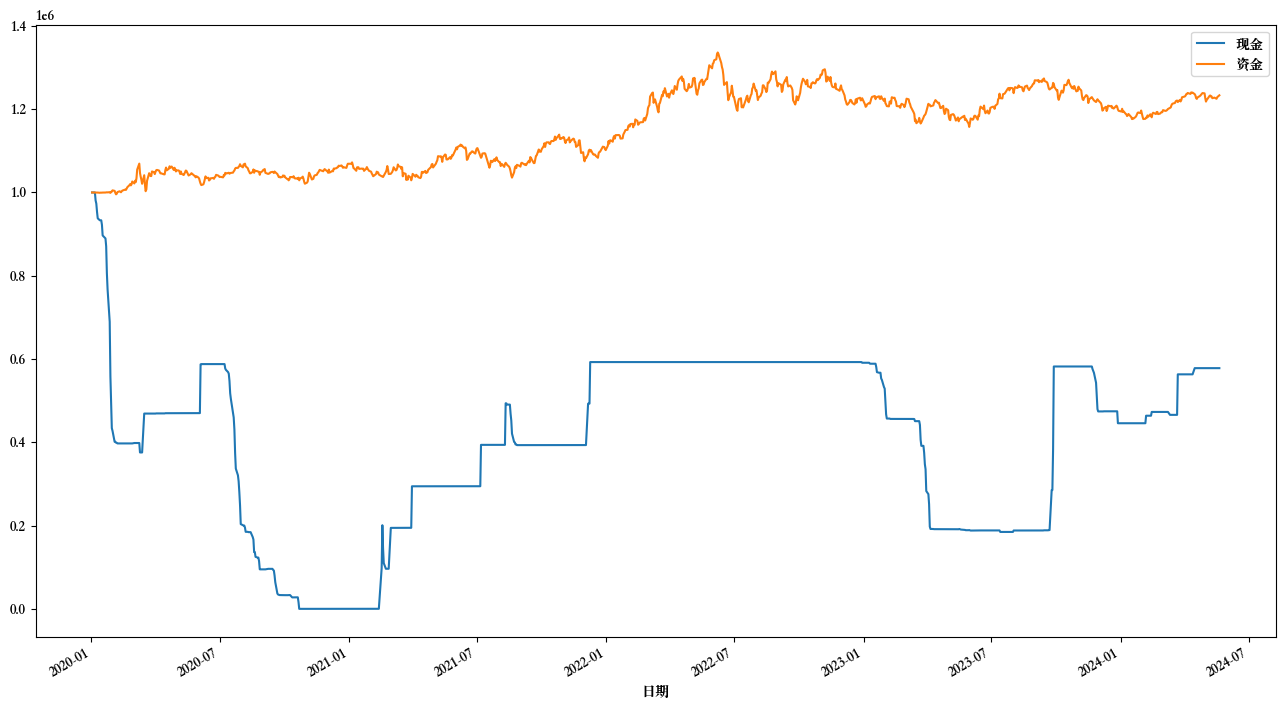

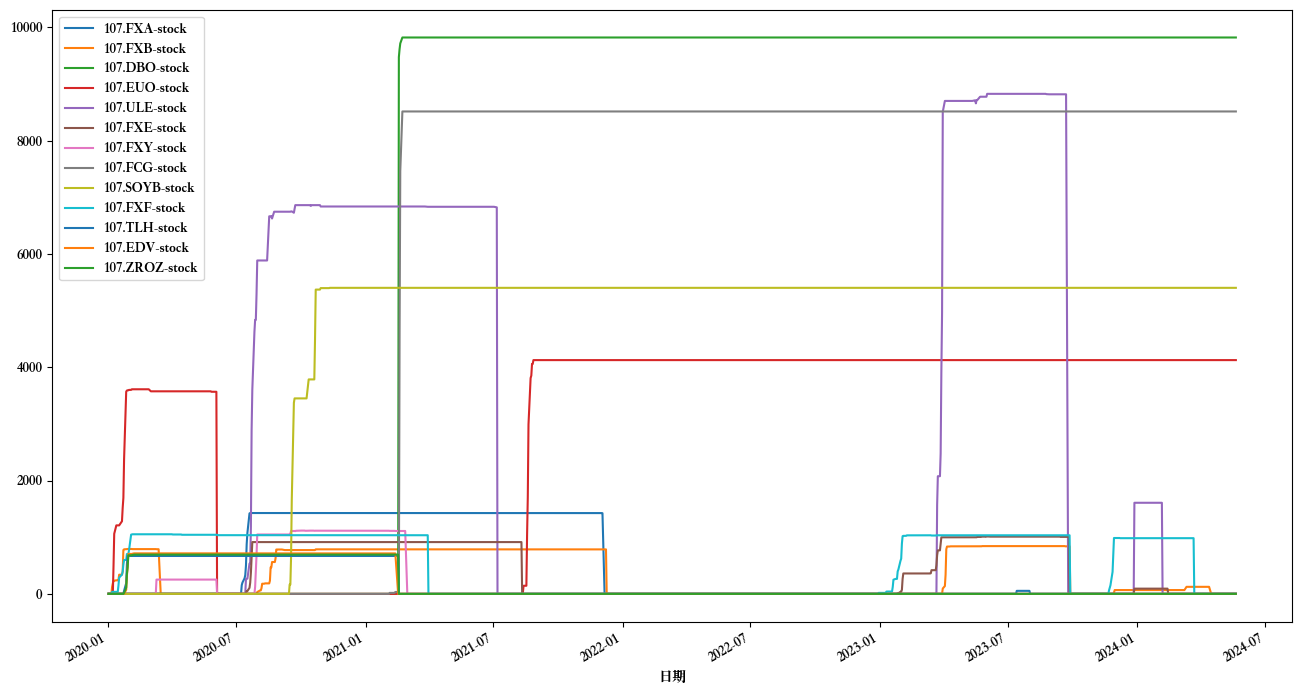

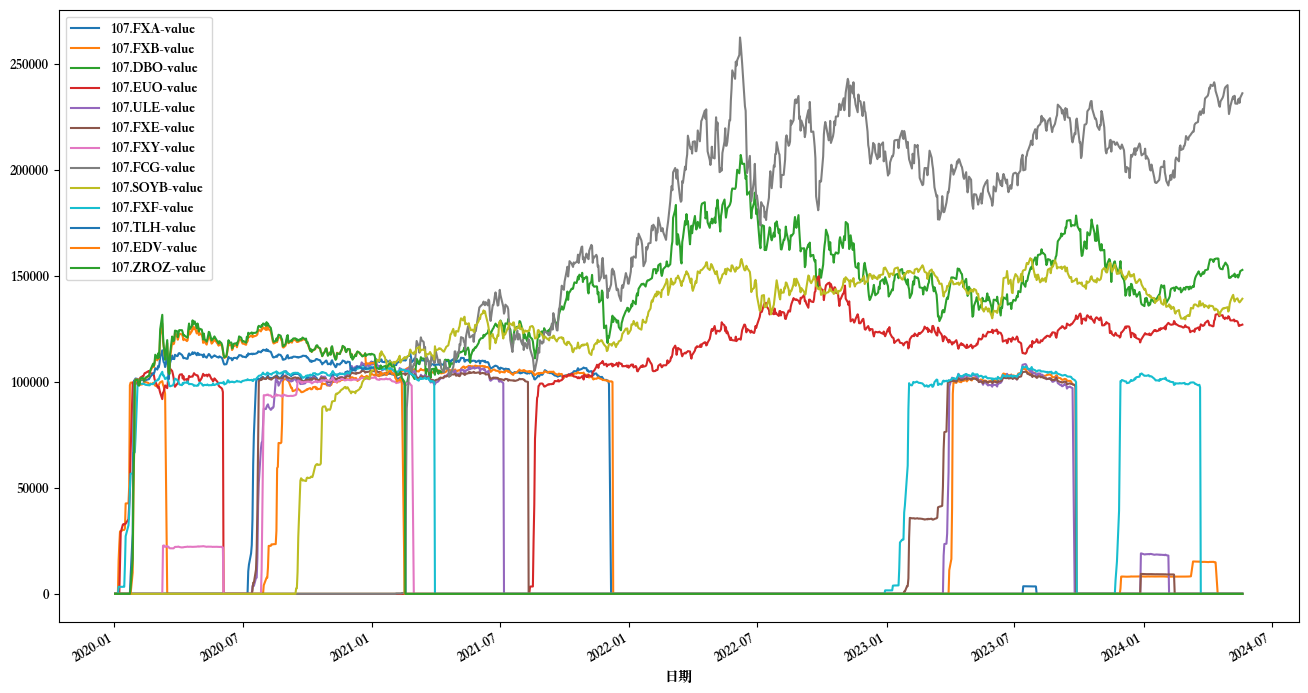

In [26]:
atr_cb = atr_channel_breakout()
atr_cb.plot(y=['现金', '资金'], x='日期', figsize=(16, 9))
atr_cb.plot(y=[f'{code}-stock' for code in data_set.keys()],
            x='日期', figsize=(16, 9))
atr_cb.plot(y=[f'{code}-value' for code in data_set.keys()],
            x='日期', figsize=(16, 9))
atr_cb.describe()

## 实验结果与分析

### 系统表现对比

| System | CAGR% | MAR | Sharpe | Trades | W%  | Max DD | DD Length |
| :----: | :---: | :-: | :----: | :----: | :-: | :----: | :-------: |
